In [4]:
# Library Import
import csv

In [5]:
# Read CSV line by line
with open("COVID-19-Faelle_7-Tage-Inzidenz_Bundeslaender.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=" ", quotechar="|")
    for row in reader:
        print(", ".join(row))

Meldedatum,Bundesland_id,Altersgruppe,Bevoelkerung,Faelle_gesamt,Faelle_neu,Faelle_7-Tage,Inzidenz_7-Tage
2020-01-03,01,00-04,130181,0,0,0,0
2020-01-03,01,00+,2922005,0,0,0,0
2020-01-03,01,05-14,264345,0,0,0,0
2020-01-03,01,15-34,628290,0,0,0,0
2020-01-03,01,35-59,1001480,0,0,0,0
2020-01-03,01,60-79,666851,0,0,0,0
2020-01-03,01,80+,230858,0,0,0,0
2020-01-03,02,00-04,98074,0,0,0,0
2020-01-03,02,00+,1853935,0,0,0,0
2020-01-03,02,05-14,170331,0,0,0,0
2020-01-03,02,15-34,491372,0,0,0,0
2020-01-03,02,35-59,652206,0,0,0,0
2020-01-03,02,60-79,326202,0,0,0,0
2020-01-03,02,80+,115750,0,0,0,0
2020-01-03,03,00-04,383698,0,0,0,0
2020-01-03,03,00+,8027031,0,0,0,0
2020-01-03,03,05-14,739657,0,0,0,0
2020-01-03,03,15-34,1808597,0,0,0,0
2020-01-03,03,35-59,2704416,0,0,0,0
2020-01-03,03,60-79,1790968,0,0,0,0
2020-01-03,03,80+,599695,0,0,0,0
2020-01-03,04,00-04,34176,0,0,0,0
2020-01-03,04,00+,676463,0,0,0,0
2020-01-03,04,05-14,61256,0,0,0,0
2020-01-03,04,15-34,171081,0,0,0,0
2020-01-03,04,35-59,222275,0,

In [7]:
# Read CSV as dictionary
with open("COVID-19-Faelle_7-Tage-Inzidenz_Bundeslaender.csv", newline="") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row["Meldedatum"], row["Faelle_gesamt"])

2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 1
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 1
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0
2020-01-03 0

In [20]:
# Read CSV, replace BundeslandId with Bundesland and write to new CSV
with open("COVID-19-Faelle_7-Tage-Inzidenz_Bundeslaender.csv", "r", newline="") as csvfile:
    reader = csv.DictReader(csvfile)
    fieldnames = reader.fieldnames
    fieldnames[1] = "Bundesland"

    bundeslaender = {
        "01": "Schleswig-Holstein",
        "02": "Hamburg",
        "03": "Niedersachsen",
        "04": "Bremen",
        "05": "Nordrhein-Westfalen",
        "06": "Hessen",
        "07": "Rheinland-Pfalz",
        "08": "Baden-Württemberg",
        "09": "Bayern",
        "10": "Saarland",
        "11": "Berlin",
        "12": "Brandenburg",
        "13": "Mecklenburg-Vorpommern",
        "14": "Sachsen",
        "15": "Sachsen-Anhalt",
        "16": "Thüringen",
    }
    with open("COVID-19-Faelle_7-Tage-Inzidenz_Bundeslaender_new.csv", "w", newline="") as newcsvfile:
        writer = csv.DictWriter(newcsvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in reader:
            row["Bundesland"] = bundeslaender[row["Bundesland"]]
            writer.writerow(row)

In [32]:
# Read CSV and aggregate specific field values
with open("COVID-19-Faelle_7-Tage-Inzidenz_Bundeslaender.csv", "r", newline="") as csvfile:
    reader = csv.DictReader(csvfile)

    total = 0
    bayernTotal = 0
    for row in reader:
        if row["Altersgruppe"] != "00+":
            fälle = int(row["Faelle_neu"])
            total += fälle
            if row["Bundesland_id"] == "09":
                bayernTotal += fälle
    print("Fälle insgesamt:", total)
    print("Fälle Bayern:", bayernTotal)

Fälle insgesamt: 36248379
Fälle Bayern: 6521841


array([<AxesSubplot: xlabel='Meldedatum'>,
       <AxesSubplot: xlabel='Meldedatum'>], dtype=object)

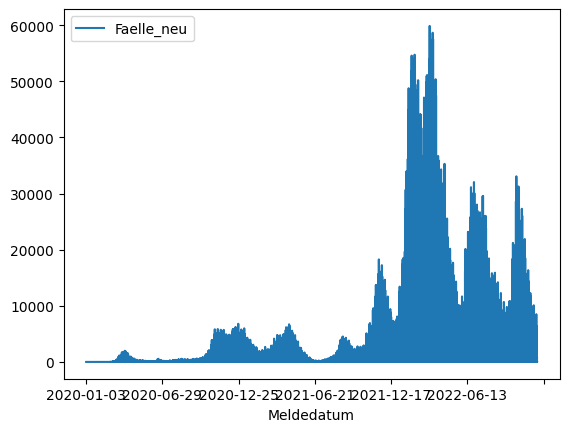

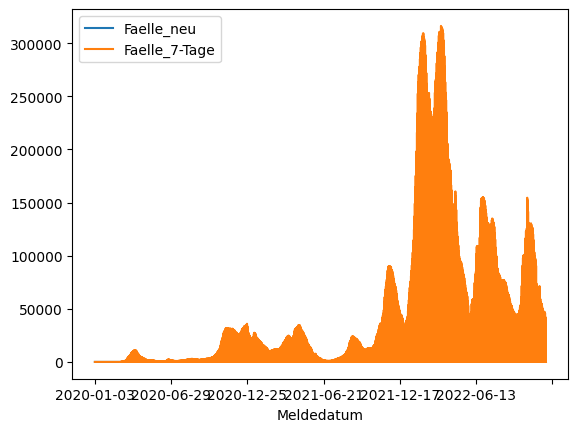

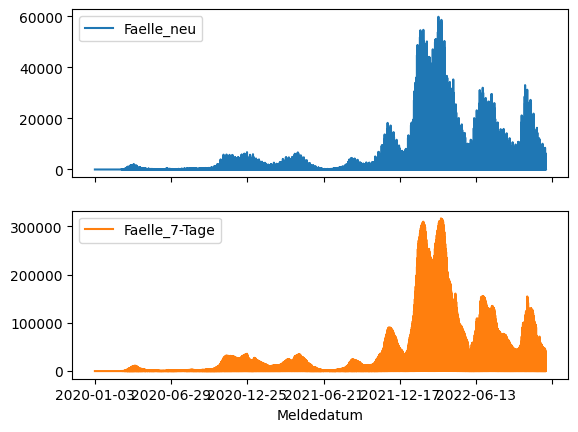